In [24]:
from nltk.corpus import movie_reviews
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding, SimpleRNN, LSTM, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fileids = movie_reviews.fileids()
reviews = [movie_reviews.raw(fileid) for fileid in fileids]
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids] 

In [3]:
np.random.seed(7)
tf.random.set_seed(7)

In [4]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token='UNK') 
tokenizer.fit_on_texts(reviews)
X = tokenizer.texts_to_sequences(reviews) 

In [5]:
print('Lengths of first 10 documents:', [len(doc) for doc in X[:10]])

Lengths of first 10 documents: [710, 240, 486, 479, 733, 671, 550, 584, 702, 776]


In [6]:
print(tokenizer.word_index['the'], tokenizer.word_index['review'], tokenizer.word_index['UNK'])

2 466 1


In [7]:
maxlen = 500
X = pad_sequences(X, maxlen=maxlen, truncating='pre') 

In [8]:
label_dict = {'pos':1, 'neg':0}
y = np.array([label_dict[c] for c in categories])
print(set(y))

{0, 1}


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [10]:
model = Sequential([
    Embedding(max_words, 32, input_length=maxlen),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 1)                 16001     
                                                                 
Total params: 336001 (1.28 MB)
Trainable params: 336001 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, 
                    epochs=100,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/100
40/40 [==============================] - 1s 8ms/step - loss: 0.6918 - acc: 0.5133 - val_loss: 0.6901 - val_acc: 0.5437
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6141 - acc: 0.8953 - val_loss: 0.6848 - val_acc: 0.5406
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.5090 - acc: 0.9680 - val_loss: 0.6731 - val_acc: 0.5594
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3753 - acc: 0.9891 - val_loss: 0.6551 - val_acc: 0.6000
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2458 - acc: 0.9953 - val_loss: 0.6359 - val_acc: 0.6375
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1457 - acc: 0.9984 - val_loss: 0.6261 - val_acc: 0.6281
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0813 - acc: 1.0000 - val_loss: 0.6209 - val_acc: 0.6344
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0437 - a

In [12]:
history

In [15]:
history.history['val_acc']

[0.543749988079071,
 0.5406249761581421,
 0.559374988079071,
 0.6000000238418579,
 0.637499988079071,
 0.628125011920929,
 0.6343749761581421,
 0.6343749761581421,
 0.637499988079071,
 0.6312500238418579,
 0.637499988079071,
 0.6312500238418579,
 0.637499988079071,
 0.6312500238418579,
 0.628125011920929,
 0.625,
 0.628125011920929,
 0.6343749761581421,
 0.6312500238418579,
 0.625,
 0.625,
 0.637499988079071,
 0.6312500238418579,
 0.6312500238418579,
 0.625,
 0.621874988079071,
 0.621874988079071,
 0.625,
 0.621874988079071,
 0.621874988079071,
 0.621874988079071,
 0.625,
 0.621874988079071,
 0.621874988079071,
 0.6187499761581421,
 0.621874988079071,
 0.612500011920929,
 0.6156250238418579,
 0.6156250238418579,
 0.6156250238418579,
 0.6187499761581421,
 0.612500011920929,
 0.6187499761581421,
 0.6156250238418579,
 0.612500011920929,
 0.612500011920929,
 0.6156250238418579,
 0.612500011920929,
 0.609375,
 0.612500011920929,
 0.6156250238418579,
 0.609375,
 0.6156250238418579,
 0.615625

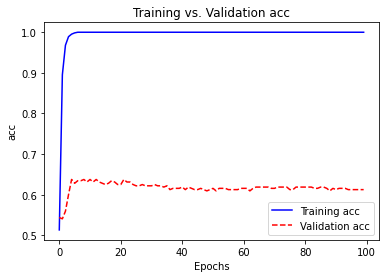

In [16]:
def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label='Training '+metric)
    plt.plot(history.history['val_'+metric], 'r--', label='Validation '+metric)
    plt.title('Training vs. Validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

plot_results(history, 'acc')

In [18]:
score = model.evaluate(X_test, y_test)
score[1]

13/13 [==============================] - 0s 2ms/step - loss: 1.1182 - acc: 0.6325


0.6324999928474426

In [20]:
model = Sequential([
    Embedding(max_words, 32),
    SimpleRNN(32),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [21]:
adam = Adam(learning_rate = 1e-4)

In [22]:
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, 
                    epochs=100,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/100
40/40 [==============================] - 3s 62ms/step - loss: 0.6940 - acc: 0.5094 - val_loss: 0.6921 - val_acc: 0.5094
Epoch 2/100
40/40 [==============================] - 2s 56ms/step - loss: 0.6821 - acc: 0.5734 - val_loss: 0.6917 - val_acc: 0.5125
Epoch 3/100
40/40 [==============================] - 2s 56ms/step - loss: 0.6694 - acc: 0.6508 - val_loss: 0.6909 - val_acc: 0.5250
Epoch 4/100
40/40 [==============================] - 2s 57ms/step - loss: 0.6528 - acc: 0.7203 - val_loss: 0.6882 - val_acc: 0.5406
Epoch 5/100
40/40 [==============================] - 2s 56ms/step - loss: 0.6301 - acc: 0.7797 - val_loss: 0.6831 - val_acc: 0.5625
Epoch 6/100
40/40 [==============================] - 2s 56ms/step - loss: 0.6009 - acc: 0.8516 - val_loss: 0.6799 - val_acc: 0.5906
Epoch 7/100
40/40 [==============================] - 2s 58ms/step - loss: 0.5596 - acc: 0.8953 - val_loss: 0.6729 - val_acc: 0.6062
Epoch 8/100
40/40 [==============================] - 2s 57ms/step - loss: 0.

In [23]:
score = model.evaluate(X_test, y_test)
score

13/13 [==============================] - 0s 11ms/step - loss: 1.2495 - acc: 0.5925


[1.2494585514068604, 0.5924999713897705]

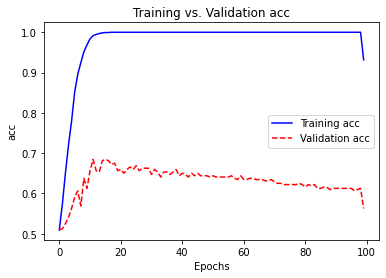

In [25]:
plot_results(history, 'acc')

In [26]:
model = Sequential([
    Embedding(max_words, 64),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [30]:
adam = Adam(learning_rate = 1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, 
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 8s 150ms/step - loss: 0.6920 - acc: 0.5469 - val_loss: 0.6930 - val_acc: 0.5125
Epoch 2/10
40/40 [==============================] - 5s 136ms/step - loss: 0.6905 - acc: 0.5711 - val_loss: 0.6928 - val_acc: 0.5125
Epoch 3/10
40/40 [==============================] - 5s 136ms/step - loss: 0.6882 - acc: 0.6133 - val_loss: 0.6922 - val_acc: 0.5344
Epoch 4/10
40/40 [==============================] - 5s 137ms/step - loss: 0.6827 - acc: 0.6422 - val_loss: 0.6891 - val_acc: 0.5531
Epoch 5/10
40/40 [==============================] - 5s 136ms/step - loss: 0.6478 - acc: 0.6898 - val_loss: 0.6412 - val_acc: 0.6594
Epoch 6/10
40/40 [==============================] - 5s 137ms/step - loss: 0.5463 - acc: 0.7930 - val_loss: 0.5592 - val_acc: 0.7375
Epoch 7/10
40/40 [==============================] - 5s 136ms/step - loss: 0.4962 - acc: 0.7867 - val_loss: 0.6090 - val_acc: 0.6344
Epoch 8/10
40/40 [==============================] - 5s 137ms/step - loss: 0.

In [31]:
score = model.evaluate(X_test, y_test)
score

13/13 [==============================] - 1s 42ms/step - loss: 0.5434 - acc: 0.7825


[0.5434330105781555, 0.7825000286102295]

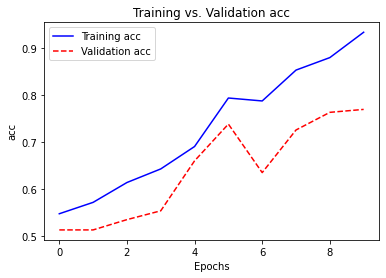

In [32]:
plot_results(history, 'acc')

In [33]:
model = Sequential([
    Embedding(max_words, 64),
    Bidirectional(GRU(64)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [34]:
adam = Adam(learning_rate = 1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, 
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 7s 128ms/step - loss: 0.6932 - acc: 0.5031 - val_loss: 0.6926 - val_acc: 0.5063
Epoch 2/10
40/40 [==============================] - 5s 114ms/step - loss: 0.6917 - acc: 0.5742 - val_loss: 0.6925 - val_acc: 0.4938
Epoch 3/10
40/40 [==============================] - 4s 112ms/step - loss: 0.6902 - acc: 0.5883 - val_loss: 0.6924 - val_acc: 0.5000
Epoch 4/10
40/40 [==============================] - 4s 111ms/step - loss: 0.6881 - acc: 0.5875 - val_loss: 0.6922 - val_acc: 0.5000
Epoch 5/10
40/40 [==============================] - 4s 112ms/step - loss: 0.6851 - acc: 0.6047 - val_loss: 0.6918 - val_acc: 0.5063
Epoch 6/10
40/40 [==============================] - 4s 111ms/step - loss: 0.6798 - acc: 0.6383 - val_loss: 0.6911 - val_acc: 0.5406
Epoch 7/10
40/40 [==============================] - 4s 112ms/step - loss: 0.6689 - acc: 0.6898 - val_loss: 0.6892 - val_acc: 0.5375
Epoch 8/10
40/40 [==============================] - 4s 112ms/step - loss: 0.

In [35]:
score = model.evaluate(X_test, y_test)
score

13/13 [==============================] - 1s 31ms/step - loss: 0.6080 - acc: 0.6575


[0.6079988479614258, 0.6575000286102295]

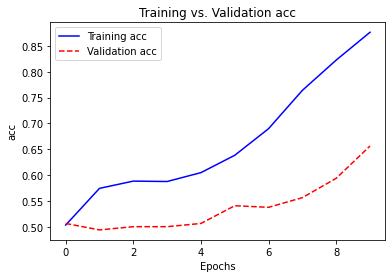

In [36]:
plot_results(history, 'acc')

In [37]:
y_pred = np.round(model.predict(X_test[:100]))
for pred, y_t in zip(y_pred, y_test[:100]):
    print(f'predicted value: {pred[0]}, true value: {y_t}, so the prediction is {pred[0] == y_t}')

4/4 [==============================] - 1s 27ms/step
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 0.0, true value: 1, so the prediction is False
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 0.0, true value: 1, so the prediction is False
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is Tru